# IMPORT PACKAGES

In [101]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# READ CSV FILE

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
df1 = pd.read_csv('noc_regions.csv')
df1.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

# EDA AND PREPROCESSING

In [5]:

print("======================Column names:===================\n", df.columns)
print("===============Data types:==========================\n", df.dtypes)
print("\n==============Summary statistics=====================:")
print(df.describe())
print("\n=========Missing values:=====================")
print(df.isnull().sum().sum())
print("\n====std=======")
print(df.std(numeric_only=True))
print("\n====unique values=======")
df.nunique()
df.shape

======================Column names:===================
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
===============Data types:==========================
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

==============Summary statistics=====================:
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168

(271116, 15)

# MERGE DATASETS

In [6]:
df = pd.merge(df, df1, on='NOC', how='inner')

In [7]:
df.tail()

ID                Name Sex   Age  Height  Weight     Team  NOC  \
270762  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
270763  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES   
270764  122166  M'apotlaki Ts'elho   F  15.0     NaN     NaN  Lesotho  LES   
270765  122215          Lefa Tsapi   M  23.0   170.0    63.0  Lesotho  LES   
270766  122299       Mosolesa Tsie   M  20.0   175.0    75.0  Lesotho  LES   

              Games  Year  Season         City      Sport  \
270762  2008 Summer  2008  Summer      Beijing  Athletics   
270763  2012 Summer  2012  Summer       London  Athletics   
270764  1996 Summer  1996  Summer      Atlanta  Athletics   
270765  1984 Summer  1984  Summer  Los Angeles     Boxing   
270766  2000 Summer  2000  Summer       Sydney     Boxing   

                                         Event Medal   region notes  
270762              Athletics Women's Marathon   NaN  Lesotho   NaN  
270763              Athletics Women's Marathon   NaN  Lesotho   NaN  
270764  Athletics Women's 4 x 100 metres Relay   NaN  Lesotho   NaN  
270765               Boxing Men's Welterweight   NaN  Lesotho   NaN  
270766               Boxing Men's Welterweight   NaN  Lesotho   NaN

In [11]:
print("\n=========Missing values:=====================")
print(df.isnull().sum().sum())


=========Missing values:=====================
629072


In [12]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 1385


In [13]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [14]:
print("\n=========Missing values:=====================")
print(df.isnull().sum())


=========Missing values:=====================
ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64


In [15]:
df= df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport', 'Event', 'Medal'])

In [16]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         3348
Height     22476
Weight     23259
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     105473
region        20
notes     122058
dtype: int64


In [29]:
df=df.reset_index(drop=True)

# DUMMY DATA

In [30]:
medal_dummies = pd.get_dummies(df['Medal'], dummy_na=False).astype(int)


In [31]:
medal_dummies = medal_dummies.astype(int).reset_index(drop=True)
print(medal_dummies.head())

   Bronze  Gold  Silver
0       0     0       0
1       0     0       0
2       0     0       0
3       0     0       0
4       0     0       0


# CONCATENATE 

In [32]:
df_final = pd.concat([df, medal_dummies], axis=1)
print(df_final.head())

     ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  Bronze  Gold  \
0               Basketball Men's Basketball   NaN  China   NaN       0     0   
1              Judo Men's Extra-Lightweight   NaN  China   NaN       0     0   
2             

In [33]:
print(df_final.index.equals(medal_dummies.index))

True


In [34]:
print(df_final.isna().sum())
print(df_final.index.equals(medal_dummies.index)) 

ID             0
Name           0
Sex            0
Age         3348
Height     22476
Weight     23259
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     105473
region        20
notes     122058
Bronze         0
Gold           0
Silver         0
dtype: int64
True


In [35]:
df_final.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  Bronze  Gold  \
0               Basketball Men's Basketball   NaN  China   NaN       0     0   
1              Judo Men's Extra-Lightweight   NaN  China   NaN       0     0   
2                 Boxing Men's Middleweight   NaN  China   NaN       0     0   
3  Wrestling Men's Lightweight, Greco-Roman   NaN  China   NaN       0     0   
4     Swimming Women's 200 metres Freestyle   NaN  China   NaN       0     0   

   Silver  
0       0  
1       0  
2       0  
3       0  
4       0

In [55]:
df_final["ID"][df_final["Age"] > 60].nunique()

73

In [54]:
num_males = df_final[df_final['Sex'] == 'M'].shape[0]
num_females = df_final[df_final['Sex'] == 'F'].shape[0]
print(f"Males: {num_males}, Females: {num_females}")

Males: 88812, Females: 35583


In [49]:
df_final['City'].nunique()

42

In [51]:
df_final['Year'].unique()

array([1992, 2012, 2000, 2004, 2016, 2006, 1998, 2002, 1996, 2008, 2014,
       1984, 1936, 1980, 1988, 2010, 1948, 1994, 1932, 1952, 1920, 1900,
       1908, 1972, 1928, 1912, 1956, 1906, 1960, 1924, 1964, 1976, 1968,
       1896, 1904], dtype=int64)

# ANALYSIS BY REGION

# GROUPBY REGION

In [36]:

grouped_dff = df_final.groupby('region')[['Gold', 'Silver', 'Bronze']].sum().reset_index()
grouped_dff= grouped_dff.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)

print(grouped_dff)


                      region  Gold  Silver  Bronze
191                      USA  1131     901     792
151                   Russia   727     600     589
67                   Germany   580     592     597
190                       UK   289     321     312
63                    France   265     287     334
..                       ...   ...     ...     ...
183              Timor-Leste     0       0       0
189             Turkmenistan     0       0       0
197                  Vanuatu     0       0       0
200  Virgin Islands, British     0       0       0
202                    Yemen     0       0       0

[205 rows x 4 columns]


In [37]:
grouped_dff['Total'] = grouped_dff['Gold'] + grouped_dff['Silver'] + grouped_dff['Bronze']


In [38]:
grouped_dff.head(25)

region  Gold  Silver  Bronze  Total
191             USA  1131     901     792   2824
151          Russia   727     600     589   1916
67          Germany   580     592     597   1769
190              UK   289     321     312    922
63           France   265     287     334    886
87            Italy   256     225     241    722
39            China   240     185     173    598
176          Sweden   200     215     242    657
78          Hungary   178     156     176    510
135          Norway   170     159     148    477
10        Australia   156     174     201    531
90            Japan   152     151     179    482
62          Finland   146     148     177    471
33           Canada   126     160     189    475
129     Netherlands   125     135     149    409
169     South Korea   116     102      99    317
177     Switzerland   108     122     116    346
150         Romania    88      95     121    304
11          Austria    85     118     123    326
45             Cuba    77      67      70    214
145          Poland    75      94     141    310
48   Czech Republic    73      85      98    256
28         Bulgaria    52      88      83    223
50          Denmark    49      82      82    213
130     New Zealand    47      28      44    119

In [39]:
print(grouped_dff[grouped_dff['region'] =='Pakistan'])

       region  Gold  Silver  Bronze  Total
137  Pakistan     3       3       4     10


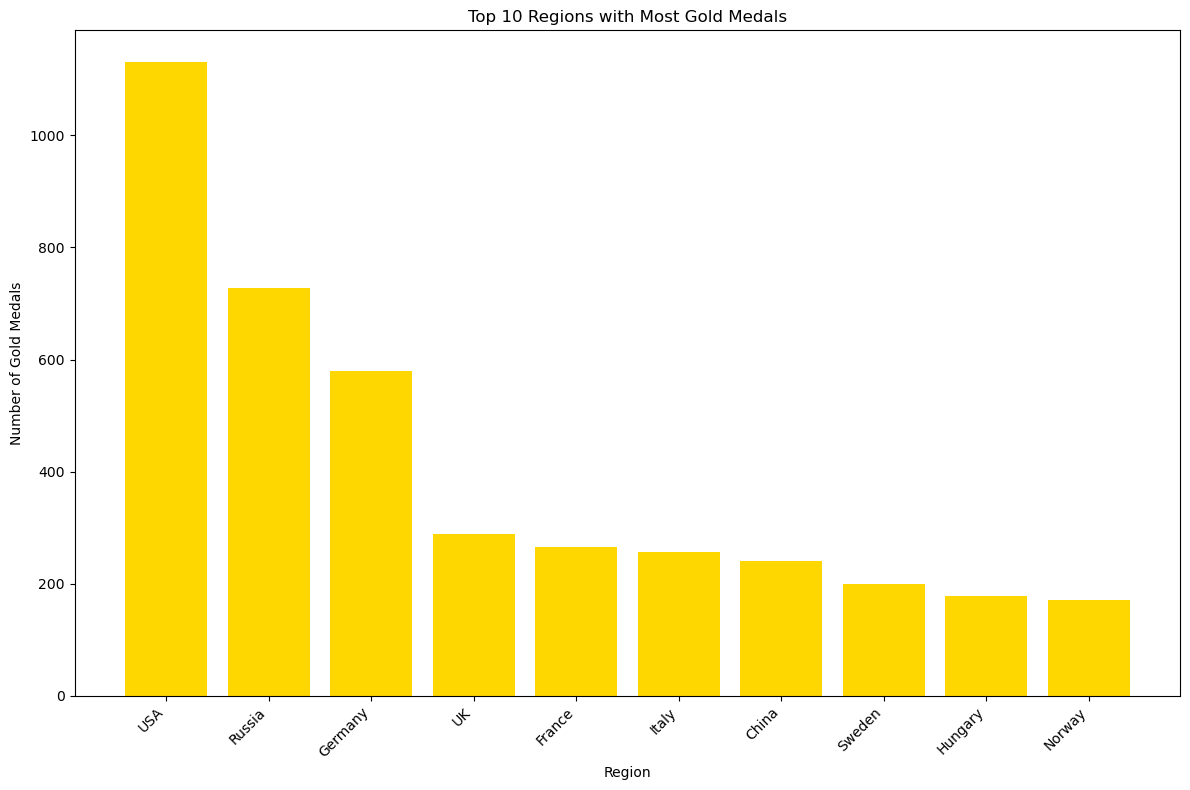

In [56]:

gold_medals = df_final[df_final['Medal'] == 'Gold']

gold_medal_counts = gold_medals.groupby('region')['Medal'].count().reset_index()
gold_medal_counts.columns = ['Region', 'Number of Gold Medals']

top_10_gold_medals = gold_medal_counts.sort_values(by='Number of Gold Medals', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_gold_medals['Region'], top_10_gold_medals['Number of Gold Medals'], color='gold')

plt.title('Top 10 Regions with Most Gold Medals')
plt.xlabel('Region')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

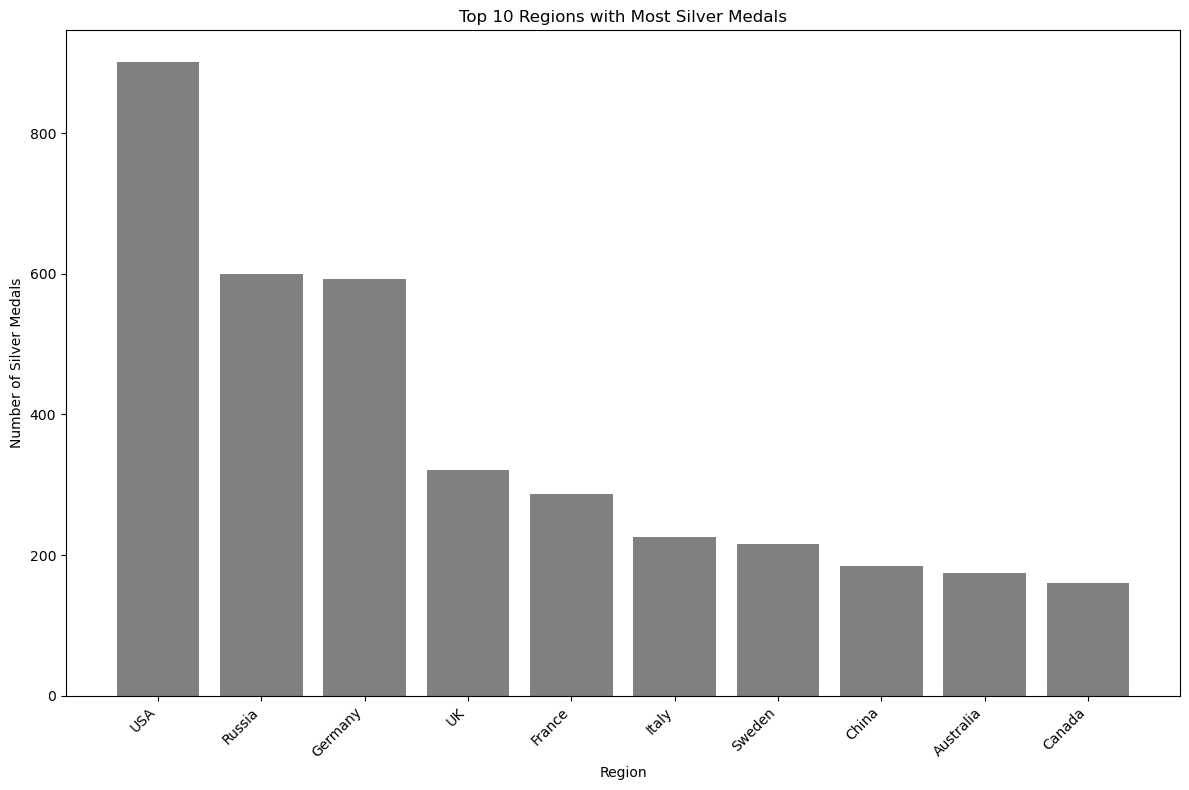

In [57]:
silver_medals = df_final[df_final['Medal'] == 'Silver']

silver_medal_counts = silver_medals.groupby('region')['Medal'].count().reset_index()
silver_medal_counts.columns = ['Region', 'Number of Silver Medals']

top_10_silver_medals = silver_medal_counts.sort_values(by='Number of Silver Medals', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_silver_medals['Region'], top_10_silver_medals['Number of Silver Medals'], color='grey')

plt.title('Top 10 Regions with Most Silver Medals')
plt.xlabel('Region')
plt.ylabel('Number of Silver Medals')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

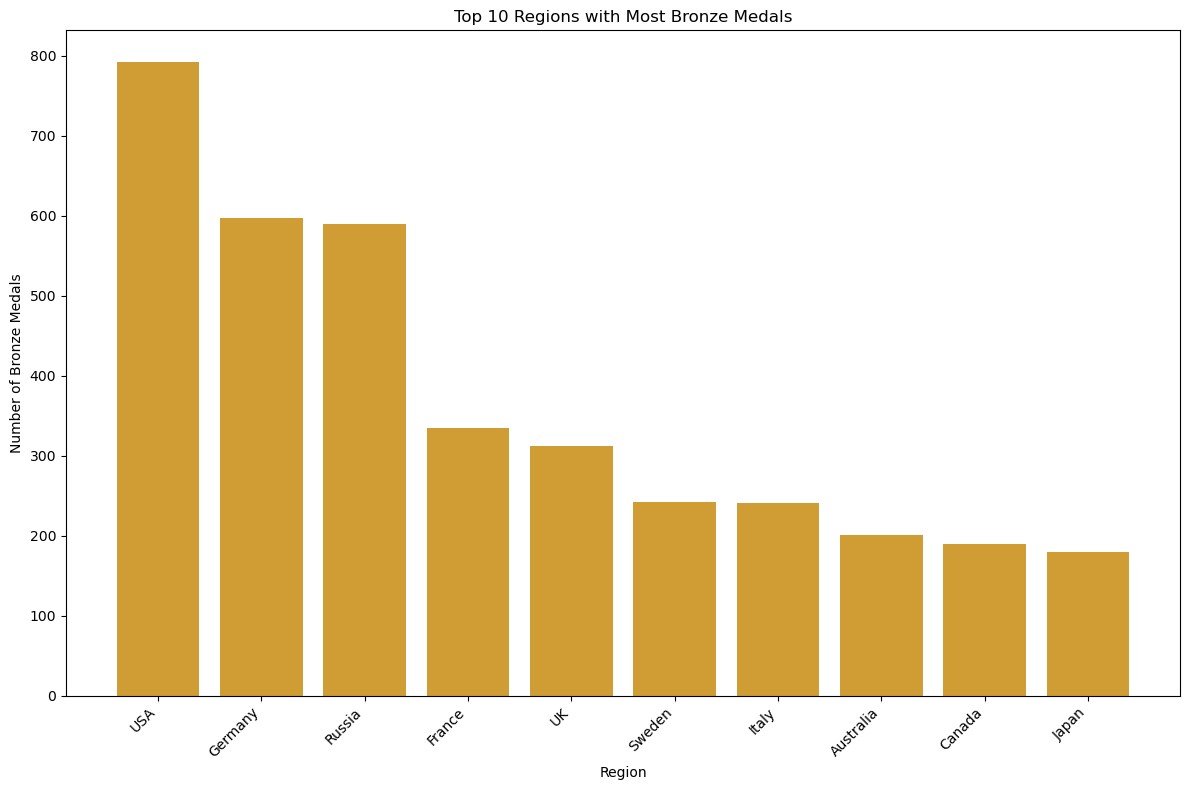

In [58]:
bronze_medals = df_final[df_final['Medal'] == 'Bronze']

bronze_medal_counts = bronze_medals.groupby('region')['Medal'].count().reset_index()
bronze_medal_counts.columns = ['Region', 'Number of Bronze Medals']

top_10_bronze_medals = bronze_medal_counts.sort_values(by='Number of Bronze Medals', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_bronze_medals['Region'], top_10_bronze_medals['Number of Bronze Medals'], color='#d09d35')

plt.title('Top 10 Regions with Most Bronze Medals')
plt.xlabel('Region')
plt.ylabel('Number of Bronze Medals')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

In [59]:
participating_countries = df_final.groupby('Year')['region'].nunique().reset_index()

participating_countries.columns = ['Year', 'Number of Countries']

fig = px.line(participating_countries, 
              x='Year', 
              y='Number of Countries', 
              title='Number of Countries Participating Each Year',
              labels={'Number of Countries': 'Number of Participating Countries'}
             )

fig.update_traces(line_color='blue')  

fig.show()

In [74]:
def visualize_medals_by_region(df_final, region):
 
    df_final = df_final.dropna(subset=['Medal'])
   
    region_df = df_final[df_final['region'] == region]
   
    region_medal_counts = region_df.groupby(['Year'])['Medal'].count().reset_index()
    region_medal_counts.columns = ['Year', 'Number of Medals']
   
    fig = px.line(region_medal_counts, 
                  x='Year', 
                  y='Number of Medals', 
                  title=f'Number of Medals Won by {region} Each Year',
                  labels={'Number of Medals': 'Number of Medals'},
                  markers=True)  
    fig.update_traces(line_color='blue')  
   
    fig.show()

In [75]:
visualize_medals_by_region(df_final, region='USA')

In [76]:
def visualize_medals_by_region(df_final, region):

    df_final = df_final.dropna(subset=['Medal'])
   
    region_df = df_final[df_final['region'] == region]
    pivot_table = region_df.pivot_table(index='Sport', 
                                        columns='Year', 
                                        values='Medal', 
                                        aggfunc='count',  
                                        fill_value=0)
    
    plt.figure(figsize=(20, 12))
    sns.heatmap(pivot_table, annot=True, fmt='d')
  
    plt.title(f'Medal Counts by Sport and Year for {region}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Sport', fontsize=14)

    plt.show()

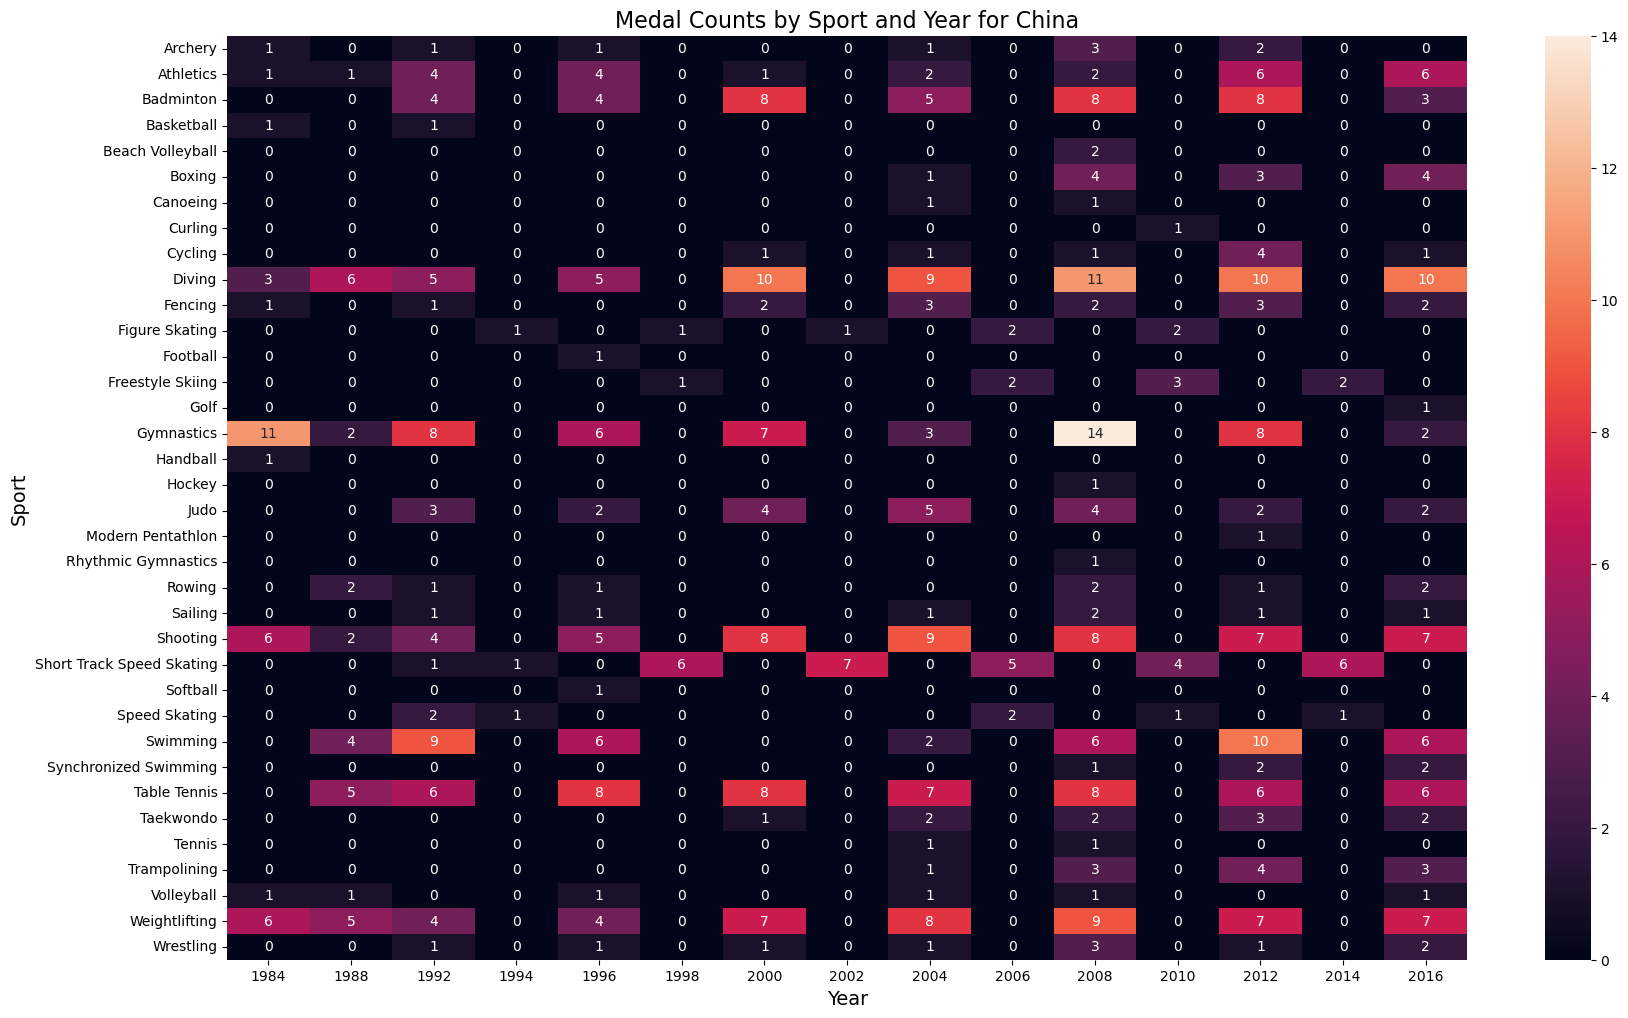

In [77]:
visualize_medals_by_region(df_final, region='China')

In [78]:
def top_athletes_table_by_region(df_final, region):
    region_df = df_final[df_final['region'] == region]
  
    athlete_medal_counts = region_df.groupby(['Name', 'Sport'])['Medal'].count().reset_index()
    athlete_medal_counts.columns = ['Name', 'Sport','Number of Medals']

    top_10_athletes = athlete_medal_counts.sort_values(by='Number of Medals', ascending=False).head(10).reset_index()
    top_10_athletes.drop(['index'],axis=1,inplace=True)
  
    return top_10_athletes

In [79]:
top_athletes_table_by_region(df_final, region='USA')

Name      Sport  Number of Medals
0            Michael Fred Phelps, II   Swimming                16
1        Raymond Clarence "Ray" Ewry  Athletics                10
2     Matthew Nicholas "Matt" Biondi   Swimming                 9
3     Frederick Carlton "Carl" Lewis  Athletics                 8
4          Shirley Frances Babashoff   Swimming                 8
5             Martin Joseph Sheridan  Athletics                 8
6  Charles Meldrum "Charlie" Daniels   Swimming                 8
7             Nathan Ghar-Jun Adrian   Swimming                 8
8          Amanda Ray Beard (-Brown)   Swimming                 7
9                 Ryan Steven Lochte   Swimming                 7

# ANALYSIS BY YEAR AND REGION

In [40]:
year=df['Year'].unique()

In [41]:
year=sorted(year)

In [42]:
year

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [43]:
country = df['region'].dropna().unique()
sorted_country = sorted(country)
print(sorted_country)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 

In [44]:
def fetch_data(df_final, year=None, country=None):
    if year is not None:
        df_final = df_final[df_final['Year'] == year]
    
    if country is not None:
        df_final = df_final[df_final['region'] == country]
 
    if year is None and country is None:
        grouped_df = df_final.groupby('region')[['Gold', 'Silver', 'Bronze']].sum().reset_index()
    elif year is None:
        grouped_df = df_final.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum().reset_index()
    else:
        grouped_df = df_final.groupby('region')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

    grouped_df['Total'] = grouped_df['Gold'] + grouped_df['Silver'] + grouped_df['Bronze']
  
    grouped_df = grouped_df.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)
   
    return grouped_df
    
    

In [45]:
result = fetch_data(df_final, year=2000, country='Canada')
result

region  Gold  Silver  Bronze  Total
0  Canada     3       3       8     14

In [46]:
result_all_countries = fetch_data(df_final, year=2000)
result_all_countries

region  Gold  Silver  Bronze  Total
184                      USA    36      24      31     91
146                   Russia    32      28      29     89
38                     China    28      16      14     58
9                  Australia    16      25      17     58
66                   Germany    13      17      26     56
..                       ...   ...     ...     ...    ...
193  Virgin Islands, British     0       0       0      0
194       Virgin Islands, US     0       0       0      0
195                    Yemen     0       0       0      0
196                   Zambia     0       0       0      0
197                 Zimbabwe     0       0       0      0

[198 rows x 5 columns]

In [47]:
result_all_years = fetch_data(df_final, country='Canada')
result_all_years

Year  Gold  Silver  Bronze  Total
30  2010    14       7       5     26
19  1984    12      19      17     48
32  2014    10      10       5     25
21  1992     9       7       9     25
28  2006     7      10       7     24
26  2002     7       3       7     17
24  1998     6       5       4     15
7   1928     5       4       7     16
33  2016     4       3      15     22
1   1904     4       1       1      6
23  1996     3      11       8     22
29  2008     3       9       7     19
8   1932     3       6      14     23
22  1994     3       6       4     13
27  2004     3       6       3     12
20  1988     3       4       8     15
3   1908     3       3      10     16
25  2000     3       3       8     14
5   1920     3       3       3      9
4   1912     3       2       3      8
15  1968     2       4       2      8
14  1964     2       3       2      7
12  1956     2       2       5      9
10  1948     2       2       3      7
11  1952     2       2       1      5
13  1960     2       2       1      5
17  1976     1       6       7     14
31  2012     1       5      12     18
9   1936     1       4       5     10
6   1924     1       3       1      5
2   1906     1       1       0      2
0   1900     1       0       1      2
16  1972     0       3       3      6
18  1980     0       1       1      2

In [48]:
result_all_data = fetch_data(df_final)
result_all_data

region  Gold  Silver  Bronze  Total
191                      USA  1131     901     792   2824
151                   Russia   727     600     589   1916
67                   Germany   580     592     597   1769
190                       UK   289     321     312    922
63                    France   265     287     334    886
..                       ...   ...     ...     ...    ...
183              Timor-Leste     0       0       0      0
189             Turkmenistan     0       0       0      0
197                  Vanuatu     0       0       0      0
200  Virgin Islands, British     0       0       0      0
202                    Yemen     0       0       0      0

[205 rows x 5 columns]

In [50]:
df_final['Sport'].unique()

array(['Basketball', 'Judo', 'Boxing', 'Wrestling', 'Swimming',
       'Speed Skating', 'Short Track Speed Skating', 'Softball', 'Hockey',
       'Curling', 'Archery', 'Triathlon', 'Football',
       'Rhythmic Gymnastics', 'Athletics', 'Badminton', 'Fencing',
       'Figure Skating', 'Gymnastics', 'Volleyball', 'Baseball',
       'Water Polo', 'Snowboarding', 'Shooting', 'Weightlifting',
       'Cycling', 'Rowing', 'Sailing', 'Diving', 'Modern Pentathlon',
       'Art Competitions', 'Synchronized Swimming', 'Handball',
       'Canoeing', 'Cross Country Skiing', 'Table Tennis', 'Ice Hockey',
       'Tennis', 'Taekwondo', 'Freestyle Skiing', 'Beach Volleyball',
       'Trampolining', 'Alpine Skiing', 'Golf', 'Biathlon',
       'Equestrianism', 'Ski Jumping', 'Tug-Of-War', 'Bobsleigh',
       'Nordic Combined', 'Polo', 'Skeleton', 'Rugby Sevens', 'Luge',
       'Roque', 'Rugby', 'Lacrosse', 'Jeu De Paume',
       'Military Ski Patrol', 'Cricket', 'Croquet', 'Motorboating',
       'Basque 

# ANALYSIS BT ATHLETES

In [52]:
def get_athlete_info(df_final, athlete_name):
    
    athlete_info = df_final[df_final['Name'] == athlete_name]
    
    if not athlete_info.empty:
    
        year = athlete_info['Year'].values[0]
        country = athlete_info['region'].values[0]
        sport = athlete_info['Sport'].values[0]
        gender = athlete_info['Sex'].values[0]
        age = athlete_info['Age'].values[0]
        height = athlete_info['Height'].values[0]
        weight = athlete_info['Weight'].values[0]
        
        print(f"Athlete: {athlete_name}")
        print(f"Year: {year}")
        print(f"Country: {country}")
        print(f"Sport: {sport}")
        print(f"Gender: {gender}")
        print(f"age: {age}")
        print(f"height: {height}")
        print(f"weight: {weight}")
            
    else:
        print(f"No information found for athlete: {athlete_name}")

In [53]:
get_athlete_info(df_final, athlete_name= "A Lamusi")

Athlete: A Lamusi
Year: 2012
Country: China
Sport: Judo
Gender: M
age: 23.0
height: 170.0
weight: 60.0


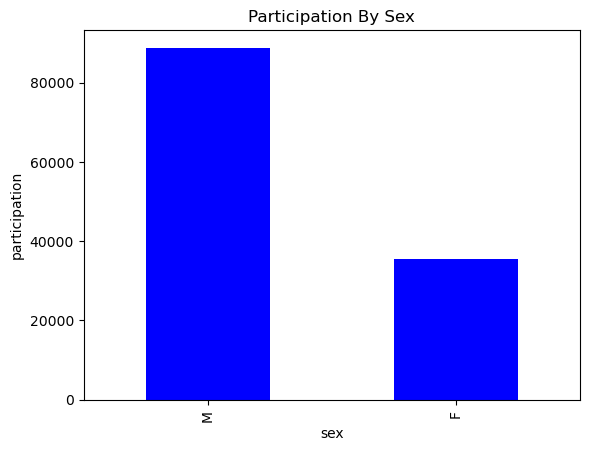

In [60]:
df_final['Sex'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('sex')
plt.ylabel('participation')
plt.title('participation by sex' .title());

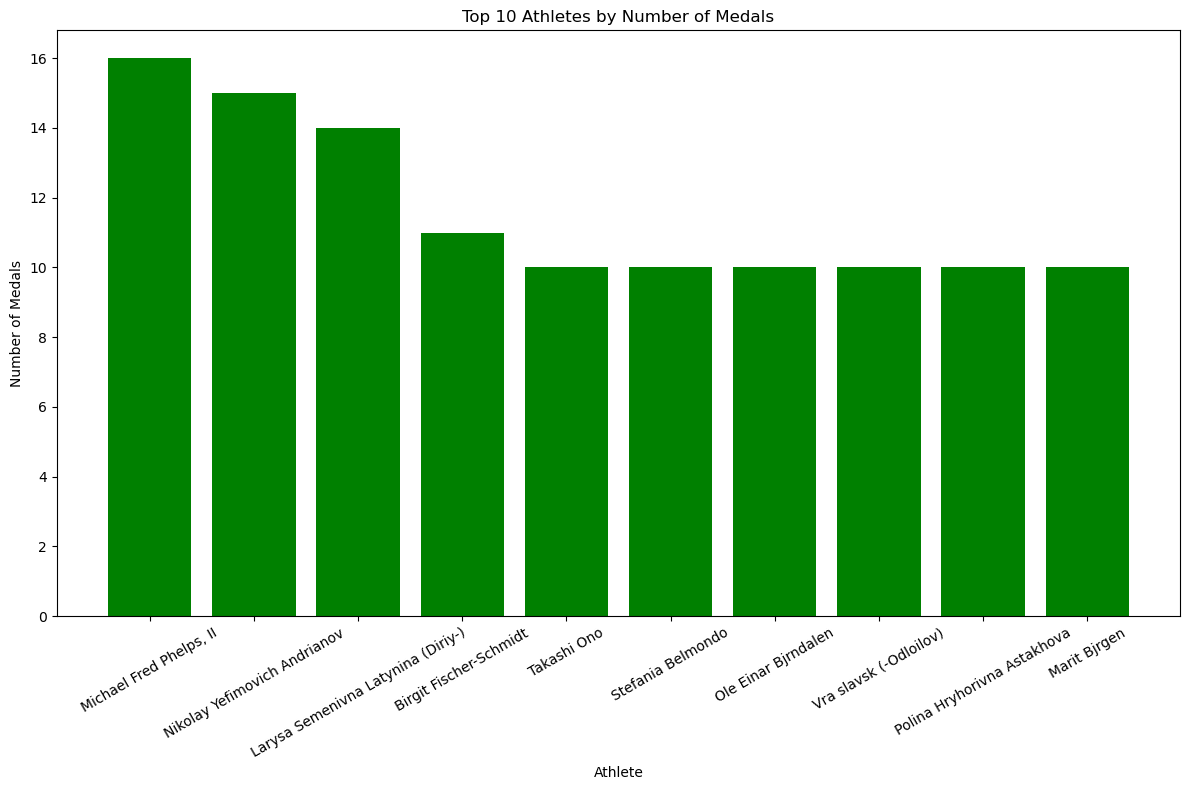

In [61]:
athlete_medal_counts = df_final.groupby('Name')['Medal'].count().reset_index()
athlete_medal_counts.columns = ['Name', 'Number of Medals']

top_10_athletes = athlete_medal_counts.sort_values(by='Number of Medals', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_athletes['Name'], top_10_athletes['Number of Medals'], color='green')

plt.title('Top 10 Athletes by Number of Medals')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ANALYSIS BY SPORTS

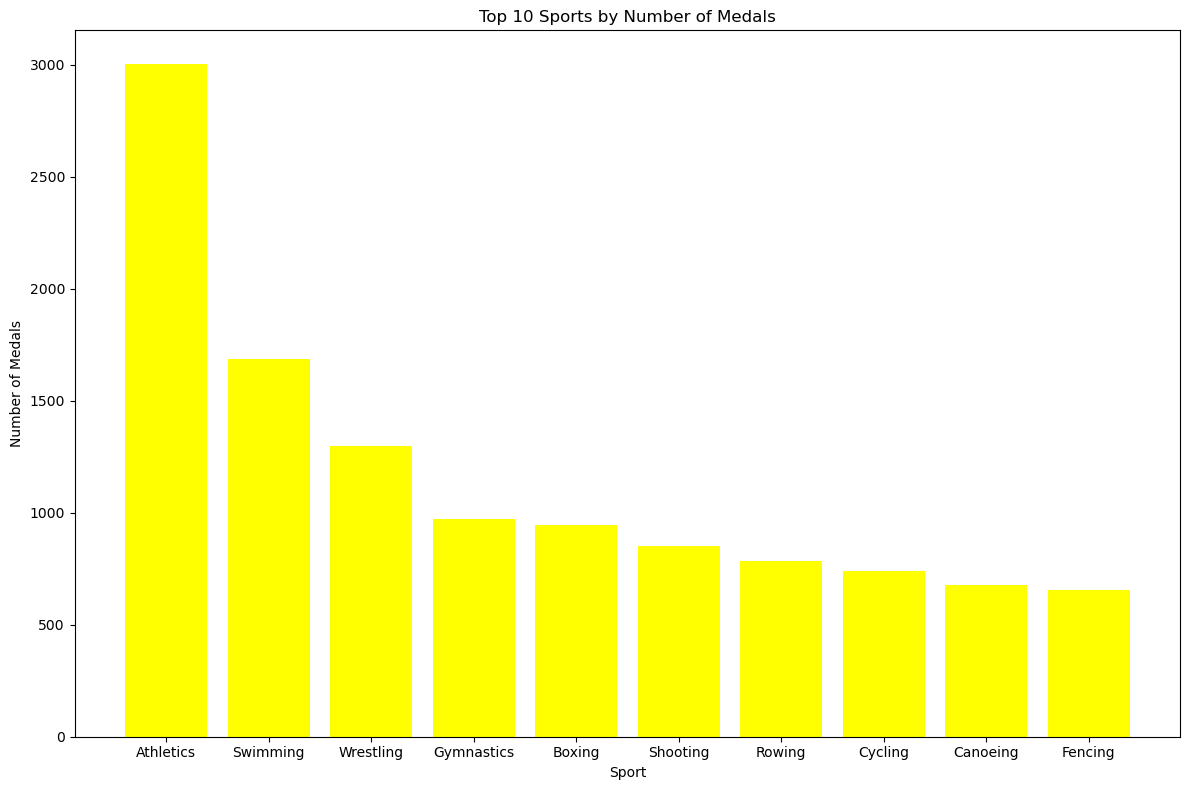

In [62]:
top_sports_medals = df_final.groupby('Sport')['Medal'].count().reset_index()


top_sports_medals.columns = ['Sport', 'Number of Medals']

top_sports = top_sports_medals.sort_values(by='Number of Medals', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_sports['Sport'], top_sports['Number of Medals'], color='yellow')

plt.title('Top 10 Sports by Number of Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='Sport'>

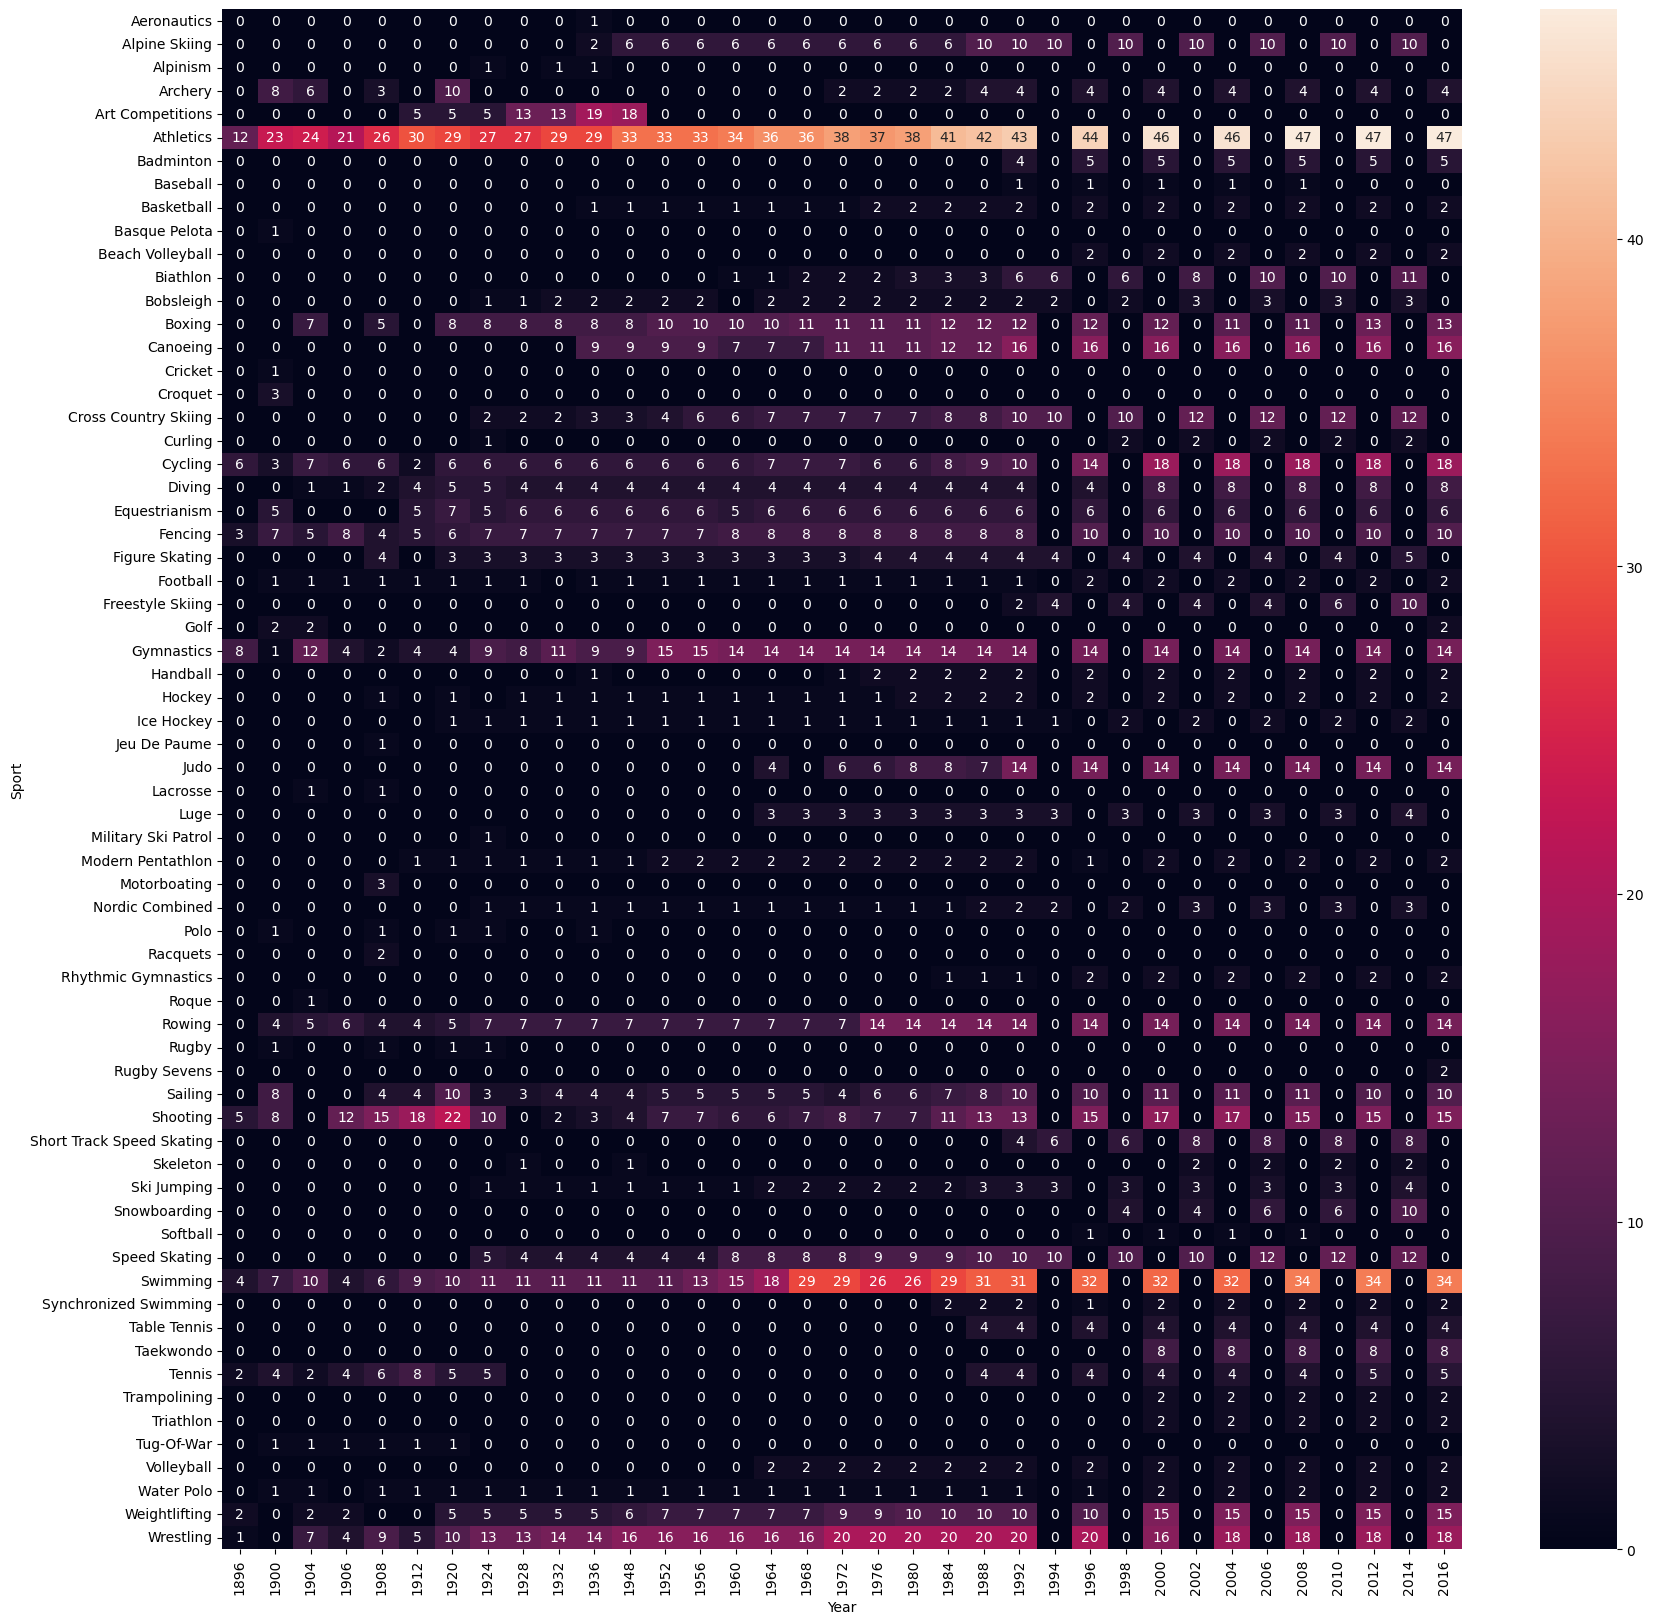

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final.pivot_table(index='Sport', 
                                   columns='Year', 
                                   values='Event', 
                                   aggfunc='nunique',  
                                   fill_value=0),annot= True)  


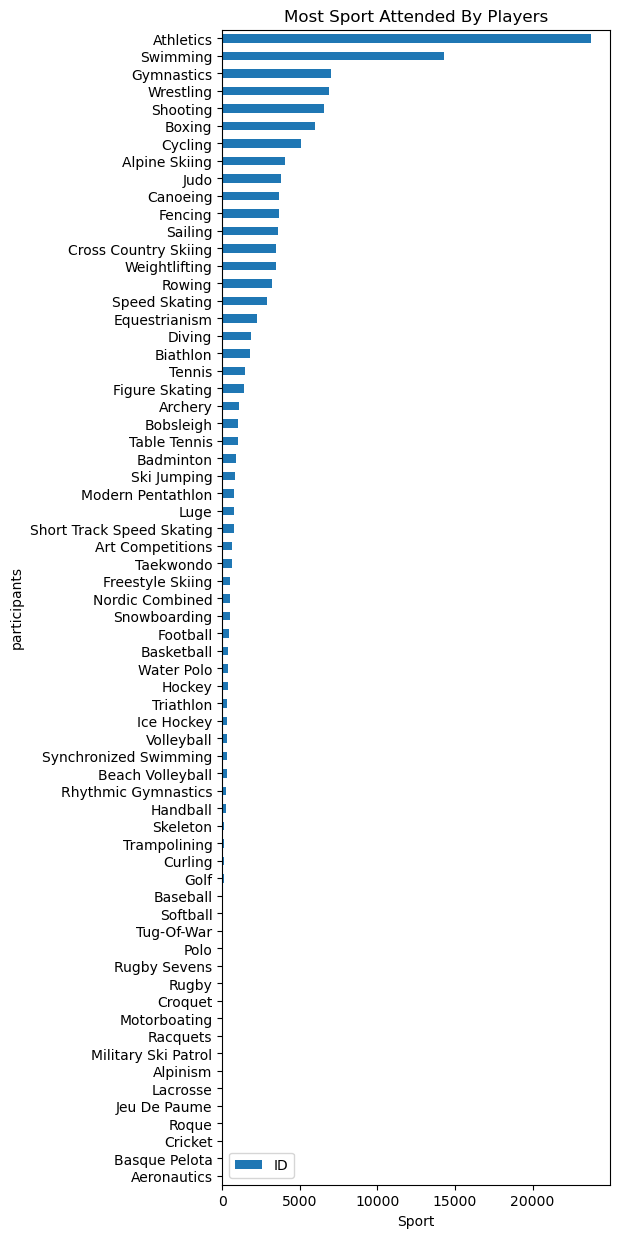

In [63]:
df_final[["ID","Sport"]].groupby(["Sport"]).count().sort_values(by="ID",ascending=True).plot(kind='barh', figsize=(5,15))
plt.xlabel('Sport')
plt.ylabel('participants')
plt.title('Most sport attended by players' .title());

In [70]:
def top_athletes_table_by_sport(df_final, sport):
    sport_df = df_final[df_final['Sport'] == sport]
  
    athlete_medal_counts = sport_df.groupby('Name')['Medal'].count().reset_index()
    athlete_medal_counts.columns = ['Name', 'Number of Medals']

    top_10_athletes = athlete_medal_counts.sort_values(by='Number of Medals', ascending=False).head(10).reset_index()
    top_10_athletes.drop(['index'],axis=1,inplace=True)
  
    return top_10_athletes

In [71]:
top_athletes_table_by_sport(df_final, sport='Athletics')

Name  Number of Medals
0            Raymond Clarence "Ray" Ewry                10
1                   Paavo Johannes Nurmi                 9
2         Frederick Carlton "Carl" Lewis                 8
3                 Martin Joseph Sheridan                 8
4               Merlene Joyce Ottey-Page                 7
5  Viljo Eino "Ville" Ritola (Koukkari-)                 6
6        Veronica Angella Campbell-Brown                 6
7                 Tirunesh Dibaba Keneni                 6
8             Eric Otto Valdemar Lemming                 6
9                       Ralph Waldo Rose                 6

# ANALYSIS BY SPORT AND YEAR

In [72]:
def top_region_table_by_sport(df_final, sport, year=None):
    
    sport_df = df_final[df_final['Sport'] == sport]

    if year is not None:
        sport_df = sport_df[sport_df['Year'] == year]
    
    region_medal_counts = sport_df.groupby(['region', 'Year'])['Medal'].count().reset_index()
    region_medal_counts.columns = ['Region', 'Year', 'Number of Medals']
 
    top_10_region = region_medal_counts.sort_values(by='Number of Medals', ascending=False).head(10).reset_index()
    top_10_region.drop(['index'],axis=1,inplace=True)
   
    return top_10_region

In [73]:
top_region_table_by_sport(df_final, sport='Athletics', year=2016)

Region  Year  Number of Medals
0           USA  2016                32
1         Kenya  2016                13
2       Jamaica  2016                11
3      Ethiopia  2016                 8
4            UK  2016                 7
5         China  2016                 6
6        Canada  2016                 6
7        France  2016                 6
8   New Zealand  2016                 4
9  South Africa  2016                 4

# ANALYSIS BY AGE, HEIGHT AND WEIGHT

In [64]:
age_distribution = df_final.groupby('Age')['ID'].nunique().reset_index()

age_distribution.columns = ['Age', 'Number of Players']

fig = px.bar(age_distribution, 
             x='Age', 
             y='Number of Players', 
             title='Number of Players by Age')

fig.update_traces(marker_color='red')

fig.show()

In [80]:
age_df = df_final.drop_duplicates(subset=['Name','region'])

In [81]:
x1= age_df['Age'].dropna()
x2= age_df[age_df['Medal']=='Gold']['Age'].dropna()
x3= age_df[age_df['Medal']=='Silver']['Age'].dropna()
x4= age_df[age_df['Medal']=='Bronze']['Age'].dropna()

In [82]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall','Gold_Medalist','Silver_medalist','Bronze_medalist'],show_hist= False,show_rug= False)
fig.update_layout(
    title="Age Distribution of Athletes by Medal Type"
)
fig.show()

In [83]:
sport = df_final['Sport'].dropna().unique()
sorted_sport = sorted(sport)
print(sorted_sport)

['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cross Country Skiing', 'Curling', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge', 'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating', 'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding', 'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']


In [84]:
x = []
name = []

for sport in sorted_sport:
    temp_df = df_final[df_final['Sport'] == sport]
    age_data = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna()
    if len(age_data) > 1: 
        x.append(age_data.tolist())
        name.append(sport)

if x:
    fig = ff.create_distplot(
        x,          
        name,       
        show_hist=False,  
        show_rug=False    
    )
    
    fig.update_layout(
        title_text='Distribution of Age for Gold Medalists Across All Sports',
        xaxis_title='Age',
        yaxis_title='Density'
    )
    

    fig.show()
else:
    print("No valid data available for plotting.")

In [94]:
height_df = df_final[['Sport', 'Height']].dropna()
height_stats = height_df.groupby('Sport')['Height'].agg(['min', 'max', 'mean']).reset_index()
height_stats.rename(columns={'mean': 'avg'}, inplace=True)
height_stats.head(10)

Sport    min    max         avg
0     Alpine Skiing  152.0  198.0  173.527160
1           Archery  152.0  197.0  172.830031
2  Art Competitions  160.0  190.0  173.888889
3         Athletics  142.0  208.0  176.460300
4         Badminton  150.0  201.0  174.498208
5          Baseball  170.0  198.0  182.394737
6        Basketball  166.0  218.0  189.429878
7  Beach Volleyball  163.0  210.0  185.831502
8          Biathlon  150.0  200.0  173.853412
9         Bobsleigh  155.0  205.0  181.653553

In [106]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=height_stats['Sport'],
    y=height_stats['min'],
    name='Min Height',
    marker_color='rgb(255, 255, 0)'  
))

fig.add_trace(go.Bar(
    x=height_stats['Sport'],
    y=height_stats['max'],
    name='Max Height',
    marker_color='rgb(0, 0, 255)'  
))


fig.add_trace(go.Bar(
    x=height_stats['Sport'],
    y=height_stats['avg'],
    name='Avg Height',
    marker_color='rgb(0, 255, 0)'  
))


fig.update_layout(
    title='Min, Max, and Avg Heights by Sport',
    xaxis_title='Sport',
    yaxis_title='Height (cm)',
    barmode='group',  
    xaxis={'categoryorder': 'total descending'},  
    template='plotly',
    height=600,  
    width=1000
)


fig.show()


In [109]:
weight_df = df_final[['Sport', 'Weight']].dropna()
weight_stats = weight_df.groupby('Sport')['Weight'].agg(['min', 'max', 'mean']).reset_index()
weight_stats.rename(columns={'mean': 'avg'}, inplace=True)
weight_stats.head(10)

Sport   min    max        avg
0     Alpine Skiing  45.0  107.0  71.877719
1           Archery  42.0  128.0  69.760171
2  Art Competitions  75.0   93.0  83.875000
3         Athletics  35.0  165.0  69.866545
4         Badminton  43.0   97.0  68.749393
5          Baseball  64.0  104.0  86.947368
6        Basketball  58.0  135.0  84.133758
7  Beach Volleyball  55.0  110.0  79.340741
8          Biathlon  45.0   95.0  66.327267
9         Bobsleigh  55.0  130.0  89.503906

In [110]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=weight_stats['Sport'],
    y=weight_stats['min'],
    name='Min Weight',
    marker_color='rgb(255, 255, 0)'  
))

fig.add_trace(go.Bar(
    x=weight_stats['Sport'],
    y=weight_stats['max'],
    name='Max Weight',
    marker_color='rgb(0, 0, 255)'  
))


fig.add_trace(go.Bar(
    x=weight_stats['Sport'],
    y=weight_stats['avg'],
    name='Avg Weight',
    marker_color='rgb(0, 255, 0)'  
))


fig.update_layout(
    title='Min, Max, and Avg Weight by Sport',
    xaxis_title='Sport',
    yaxis_title='Weight',
    barmode='group',  
    xaxis={'categoryorder': 'total descending'},  
    template='plotly',
    height=600,  
    width=1000
)


fig.show()
